In [1]:

import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import zipfile

with zipfile.ZipFile("Hydrated_dataset.zip", "r") as zip_ref:
    zip_ref.extractall("Hydrated_dataset")

In [4]:
import pandas as pd
import os

folder_path = '/content/Hydrated_dataset'

dfs = []
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(folder_path, filename))
        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

<ipython-input-4-2f07188b0c63>:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(folder_path, filename))


In [5]:
columns_to_drop = [column for column in combined_df.columns if column != 'text']

# Drop the unwanted columns
combined_df.drop(columns_to_drop, axis=1, inplace=True)

In [6]:
combined_df.head()

,text
0,"like the ""1st covid case ever"" last november, ..."
1,Ministro de Salud adelantó para el 10 de dicie...
2,#BREAKING Premier Annastacia Palaszczuk said g...
3,Wall Street turns red as Omicron reaches US; D...
4,$KBA NEW ARTICLE : Investing in China to Dodge...


In [7]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_mentions_hashtags(text):
    return re.sub(r'@\w+|#\w+', '', text)

def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


def tokenize(text):
    return word_tokenize(text)


def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]


def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [8]:
def preprocess_text(text):
    text = text.lower()
    text = remove_urls(text)
    text = remove_mentions_hashtags(text)
    text = remove_special_chars(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize(tokens)
    return ' '.join(tokens)

In [10]:
combined_df.head()

,text
0,"like the ""1st covid case ever"" last november, ..."
1,Ministro de Salud adelantó para el 10 de dicie...
2,#BREAKING Premier Annastacia Palaszczuk said g...
3,Wall Street turns red as Omicron reaches US; D...
4,$KBA NEW ARTICLE : Investing in China to Dodge...


In [11]:
combined_df['clean_text'] = combined_df['text'].apply(preprocess_text)

In [12]:
combined_df.head()

,text,clean_text
0,"like the ""1st covid case ever"" last november, ...",like st covid case ever last november st omicr...
1,Ministro de Salud adelantó para el 10 de dicie...,ministro de salud adelant para el de diciembre...
2,#BREAKING Premier Annastacia Palaszczuk said g...,premier annastacia palaszczuk said genomic seq...
3,Wall Street turns red as Omicron reaches US; D...,wall street turn red omicron reach u dow jones...
4,$KBA NEW ARTICLE : Investing in China to Dodge...,kba new article investing china dodge omicron ...


In [13]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    
    polarity = blob.sentiment.polarity
    
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    return sentiment

combined_df['sentiment'] = combined_df['clean_text'].apply(get_sentiment)

for index, row in combined_df.head(10).iterrows():
    print(row['clean_text'], '===>', row['sentiment'])

like st covid case ever last november st omicron case usa probably brought usa week thanksgiving ===> Neutral
ministro de salud adelant para el de diciembre la medidas restrictivas al uso de espacios cerrados para prevenir aparicin de la variante micron se impondr obligatoriedad de presentar carn de vacunacin para ingresar espacios cerrados en todo el territorio nacional ===> Neutral
premier annastacia palaszczuk said genomic sequencing yet determine whether active covid case omicron variant although considered unlikely two case detected hotel quarantine ===> Negative
wall street turn red omicron reach u dow jones fall point ===> Neutral
kba new article investing china dodge omicron impact get latest kba related news ===> Positive
there always one hour location city certain size unless gripped omicron panic generally walk get booster time course im south flyover ===> Positive
person first suggested name omicron might excellent medical expert also exceptionally illiterate dont want viru

In [14]:
combined_df.head()

,text,clean_text,sentiment
0,"like the ""1st covid case ever"" last november, ...",like st covid case ever last november st omicr...,Neutral
1,Ministro de Salud adelantó para el 10 de dicie...,ministro de salud adelant para el de diciembre...,Neutral
2,#BREAKING Premier Annastacia Palaszczuk said g...,premier annastacia palaszczuk said genomic seq...,Negative
3,Wall Street turns red as Omicron reaches US; D...,wall street turn red omicron reach u dow jones...,Neutral
4,$KBA NEW ARTICLE : Investing in China to Dodge...,kba new article investing china dodge omicron ...,Positive


([<matplotlib.axis.XTick at 0x7fca0b99e1f0>,
 [Text(1, 0, 'Positive'), Text(2, 0, 'Neutral'), Text(3, 0, 'Negative')])

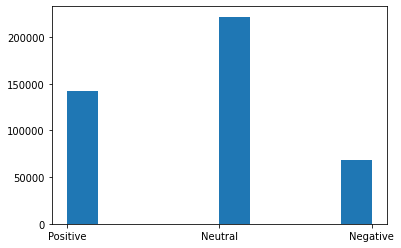

In [15]:
import matplotlib.pyplot as plt

sentiment_map = {'Positive': 1, 'Neutral': 2, 'Negative': 3}
combined_df['sentiment_value'] = combined_df['sentiment'].map(sentiment_map)

# Plot the density of sentiments using matplotlib
plt.hist(data=combined_df, x='sentiment_value')
plt.xticks(ticks=[1, 2, 3], labels=['Positive', 'Neutral', 'Negative'])

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X = combined_df['text']
y = combined_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



In [32]:
vectorizer = TfidfVectorizer() 

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [21]:
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

MultinomialNB()

In [22]:
y_pred = clf.predict(X_test_vec)

# Print accuracy score and classification report
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 66.43%

Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.02      0.03     13708
     Neutral       0.92      0.69      0.79     44321
    Positive       0.50      0.94      0.66     28324

    accuracy                           0.66     86353
   macro avg       0.77      0.55      0.49     86353
weighted avg       0.78      0.66      0.62     86353



In [33]:
myresult = clf.predict(vectorizer.transform(["All will be dying from omicron"]))
myresult

array(['Positive'], dtype='<U8')

In [34]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


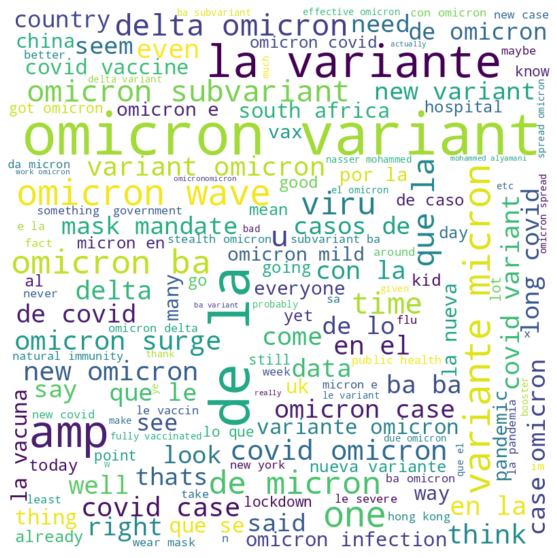

In [39]:
from wordcloud import WordCloud, STOPWORDS


stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=150, width=800, height=800).generate(''.join(combined_df["clean_text"]))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()